<a href="https://colab.research.google.com/github/fasthill/ML-DL-study-alone/blob/main/5-1%20%EA%B2%B0%EC%A0%95%20%ED%8A%B8%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analyse from LightGBM

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/5-1.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
import datetime
import os, re

In [2]:
from xgboost import XGBClassifier
import xgboost
from lightgbm import LGBMClassifier
import lightgbm
import joblib

In [3]:
from sklearn.linear_model import LogisticRegression, SGDClassifier, SGDRegressor
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [4]:
import pickle

# write list, dictionary to pickle
def save_to_pickle(path, filename):
    open_file = open(path, "wb")
    pickle.dump(filename, open_file)
    open_file.close()

# read list, dictionary from pickle
def load_from_pickle(path):
    open_file = open(path, "rb")
    loaded_file = pickle.load(open_file)
    open_file.close()
    return loaded_file

In [29]:
import csv

# write list, dictionary to csv
# path = './xxx/', my_dict = filename

def save_dict_to_csv(path, my_dict):
    df = pd.DataFrame.from_dict(my_dict, orient='index') 
    df.to_csv (path, index=False, header=True)  
    
def save_list_to_csv(path, my_list):
    df = pd.DataFrame(my_list, columns=['columns'])
    df.to_csv (path, index=False, header=True) 
    
# def load_dict_from_csv(path):
#     df = pd.read_csv(path, header=None)
#     my_dict = df.to_dict()
#     return my_dict

In [7]:
def predict_p(test_target, y_predict_list): 
    ps = precision_score(test_target, y_predict_list)
    rs = recall_score(test_target, y_predict_list)
    fs = f1_score(test_target, y_predict_list)
    roc = roc_auc_score(test_target, y_predict_list)
    collect_list = [ps, rs, fs, roc]
    return collect_list

In [8]:
def make_df_from_estimator(estimator, num):
    df_t = pd.DataFrame.from_dict(estimator, orient='index')
    df_t.columns = [f'value{num}']
    df_t.index.name = 'parameter'
    return df_t

In [9]:
def calc_results(model, train_scaled, val_scaled, test_scaled, train_target, val_target, test_target,
                 test_scaled1, test_scaled2, test_scaled3, test_target1, test_target2, test_target3):
# model = lgbmgs.best_estimator_  # 최적의 파라미터로 모델 생성
    y_predict = model.predict(test_scaled)
    result_dict= {}
    result_dict['best_score'] = lgbmgs.best_score_ 
    result_dict['best_index'] = lgbmgs.best_index_
    result_dict['acc_train'] = model.score(train_scaled, train_target)
    result_dict['acc_val'] = model.score(val_scaled, val_target)
    result_dict['acc_test'] = model.score(test_scaled, test_target)
    result_dict['precision'] = precision_score(test_target, y_predict)
    result_dict['recall'] = recall_score(test_target, y_predict)
    result_dict['f1score'] = f1_score(test_target, y_predict)
    result_dict['roc'] = roc_auc_score(test_target, y_predict)
    cm = confusion_matrix(test_target, y_predict)
    result_dict['tn'] = cm[0,0]
    result_dict['fp'] = cm[0,1]
    result_dict['fn'] = cm[1,0]
    result_dict['tp'] = cm[1,1]
    #------------------------------------
    y_predict = model.predict(test_scaled1)
    result_dict['acc_test1'] = model.score(test_scaled1, test_target1)
    result_dict['precision1'] = precision_score(test_target1, y_predict)
    result_dict['recall1'] = recall_score(test_target1, y_predict)
    result_dict['f1score1'] = f1_score(test_target1, y_predict)
    result_dict['roc1'] = roc_auc_score(test_target1, y_predict)
    cm = confusion_matrix(test_target1, y_predict)
    result_dict['tn1'] = cm[0,0]
    result_dict['fp1'] = cm[0,1]
    result_dict['fn1'] = cm[1,0]
    result_dict['tp1'] = cm[1,1]
    #------------------------------------
    y_predict = model.predict(test_scaled2)
    result_dict['acc_test2'] = model.score(test_scaled2, test_target2)
    result_dict['precision2'] = precision_score(test_target2, y_predict)
    result_dict['recall2'] = recall_score(test_target2, y_predict)
    result_dict['f1score2'] = f1_score(test_target2, y_predict)
    result_dict['roc2'] = roc_auc_score(test_target2, y_predict)
    cm = confusion_matrix(test_target2, y_predict)
    result_dict['tn2'] = cm[0,0]
    result_dict['fp2'] = cm[0,1]
    result_dict['fn2'] = cm[1,0]
    result_dict['tp2'] = cm[1,1]
    #------------------------------------
    y_predict = model.predict(test_scaled3)
    result_dict['acc_test3'] = model.score(test_scaled3, test_target3)
    result_dict['precision3'] = precision_score(test_target3, y_predict)
    result_dict['recall3'] = recall_score(test_target3, y_predict)
    result_dict['f1score3'] = f1_score(test_target3, y_predict)
    result_dict['roc3'] = roc_auc_score(test_target3, y_predict)
    cm = confusion_matrix(test_target3, y_predict)
    result_dict['tn3'] = cm[0,0]
    result_dict['fp3'] = cm[0,1]
    result_dict['fn3'] = cm[1,0]
    result_dict['tp3'] = cm[1,1]
    return result_dict

In [10]:
code = {'005930' : ['삼성전자', 'sec'], '373220' : ['LG에너지솔루션', 'lgenergy'], 
        '000660' : ['SK하이닉스', 'skhinix'], '207940' : ['삼성바이오로직스', 'ssbio'],
        '006400' : ['삼성SDI', 'sdi'], '051910' : ['LG화학', 'lgchemical'],
        '005935' : ['삼성전자우', 'secpre'], '005380' : ['현대차', 'hyunmotor'],
        '035420' : ['NAVER', 'naver'], '000270' : ['기아','kia'],
        '035720' : ['카카오', 'kakao'], '005490' : ['POSCO홀딩스', 'poscoholding'],
        '105560' : ['KB금융', 'kbbank'], '028260' : ['삼성물산', 'sscnt'],
        '068270' : ['셀트리온', 'celltrion'], '012330' : ['현대모비스', 'mobis'],
        '055550' : ['신한지주', 'shgroup'], '066570' : ['LG전자', 'lgelec'],
        '003670' : ['포스코케미칼', 'poscochemical'], '096770' : ['SK이노베이션', 'skinnovation'],
        '033780' : ['KT&G', 'ktng']}

code = {'005930' : ['삼성전자', 'sec']}

In [11]:
new_col = ['retail_1', 'foreigner_1', 'institution_1', 'financial_1', 'invtrust_1',
       'pension_1', 'privequity_1', 'insurance_1', # bank_1, 'financeetc_1 제외
#         'pension_1', 'privequity_1', 'bank_1', 'insurance_1', 'financeetc_1',
       'corporateetc_1', 'foreigneretc_1', 'dji_cr', 'dji_f_cr', 'ixic_cr',
       'ixic_f_cr', 'spx_cr', 'spx_f_cr', 'bond_kor_10_cr', 'bond_kor_2_cr',
       'dxy_cr', 'bond_usa_10_cr', 'bond_usa_2_cr', 'bond_usa_3m_cr',
       'kosdaq_cr', 'kospi_cr', 'krw_cr', 'sox_cr', 'vix_cr', 'wti_cr',
       'open_1', 'high_1', 'low_1', 'close_1', 'vol_1', 'retail_2',
       'foreigner_2', 'institution_2', 'financial_2', 'invtrust_2',
       'pension_2', 'privequity_2', 'insurance_2', # bank_2, 'financeetc_2 제외
#        'pension_2', 'privequity_2', 'bank_2', 'insurance_2', 'financeetc_2',
       'corporateetc_2', 'foreigneretc_2', 'dji_cr_2', 'dji_f_cr_2',
       'ixic_cr_2', 'ixic_f_cr_2', 'spx_cr_2', 'spx_f_cr_2',
       'bond_kor_10_cr_2', 'bond_kor_2_cr_2', 'dxy_cr_2', 'bond_usa_10_cr_2',
       'bond_usa_2_cr_2', 'bond_usa_3m_cr_2', 'kosdaq_cr_2', 'kospi_cr_2',
       'krw_cr_2', 'sox_cr_2', 'vix_cr_2', 'wti_cr_2', 'open_2', 'high_2',
       'low_2', 'close_2', 'vol_2', 'weekday', 'cr_00', 'cr_05', 'cr_10',
       'cr_15', 'cr_20']

# bank, financeetc는 결측치가 많아서 사용하지 않음.
# df.drop(['bank_1', 'bank_2', 'financeetc_1', 'financeetc_2'], axis=1, inplace=True)   

In [12]:
# 최초의 empty df 생성
df_base = pd.DataFrame(pd.Series([],dtype=pd.StringDtype(), name='parameter')).set_index('parameter')
iter = 0

In [13]:
com_name = 'sec'

directory_for_ml = '../data/data_for_ml/expand_date/'
fname = f'df_{com_name}_sel.pkl'
f_name = directory_for_ml + fname
df_o = pd.read_pickle(f_name) 

In [14]:
new_col = load_from_pickle('./sec/columns_0323_1641_50_81%_ver8.pkl')

In [18]:
# 반복 작업시 여기서 부터 진행 (feature importance로 선정된 새로운 column으로)

df = df_o[new_col]  # 새롭게 선정된 column으로 진행

# train, val,: 8, test: 2
split_ratio = 0.8
split_n = int(len(df)*split_ratio)

test_interval = int((len(df) - split_n)/3)
data = df.iloc[:split_n, :-5]
target = df.iloc[:split_n, -5]
test_input = df.iloc[split_n:, :-5]
test_target = df.iloc[split_n:, -5]
test_input1 = df.iloc[split_n:split_n+test_interval, :-5]
test_input2 = df.iloc[split_n+test_interval: split_n+test_interval*2, :-5]
test_input3 = df.iloc[split_n+test_interval*2:, :-5]
test_target1 = df.iloc[split_n:split_n+test_interval, -5]
test_target2 = df.iloc[split_n+test_interval: split_n+test_interval*2, -5]
test_target3 = df.iloc[split_n+test_interval*2:, -5]

train_input, val_input, train_target, val_target = \
     train_test_split(data, target, random_state=42, test_size=0.2, stratify=target)

scaler = StandardScaler()
scaler.fit(train_input)
train_scaled = scaler.transform(train_input)
val_scaled = scaler.transform(val_input)
test_scaled = scaler.transform(test_input)
test_scaled1 = scaler.transform(test_input1)
test_scaled2 = scaler.transform(test_input2)
test_scaled3 = scaler.transform(test_input3)

In [19]:
param_base = {'boosting_type' : ['gbdt'], # ['gbdt', dart', 'goss'], # dart : 신경망의 드롭아웃을 적용시킨 방법, 
              'num_leaves' :  [6, 7, 8,], # 두번째로 중요, num_leaves는 작은 데이터면 작은 숫자로
              'learning_rate' :  [0.001, 0.0015, 0.0017, 0.002, 0.0025],
#               'max_delta_step' :  [0.4, 0.5, 0.6],
              'n_estimators' :  [1000, 1100, 1200, 1300, 1400],
              'colsample_bytree' :  [ 0.6, 0.7, 0.8], # = feature fraction, column sampling. 위의 subsample과 같이 튜닝.
              'subsample' : [1], #  [0.1, 0.2, 0.3, 0.4], # 세번째로 중요. = bagging fraction, row sampling. 아래 colsample_bytree과 같이 튜닝.
              'max_depth' :  [-1], # 가장 먼저 튜닝 필요 -1이 default (무한깊이) 일반적으로 default가 가장 좋음.
              'objective': ['binary'],
              'metric': ['binary_logloss'],
              'scale_pos_weight': [1.0, 1.5, 2], # posiive  증가, class imbalance 경감, scale_pos_weight > 0.0, default=1.0. 
#               'min_child_samples' : [30],
#               'lambda_l1': [0, 5], # default 0
#               'lambda_l2': [0, 5], #default 0
              }

In [20]:
param_grid = {
#     'cv' : 7,
    'cv' : None,
    'scoring' : None,
#     'scoring' : 'precision',
#     'scoring' : 'accuracy',
    'num_col' : len(new_col)
             }

In [25]:
param_base = load_from_pickle('./sec/params_0323_1641_81%_ver8.pkl') # 읽고 수정하기

In [26]:
param_base = {'boosting_type': ['gbdt'],
 'num_leaves': [6,],
 'learning_rate': [0.0015,],
 'n_estimators': [1300],
 'colsample_bytree': [0.6,],
 'subsample': [1],
 'max_depth': [-1],
 'objective': ['binary'],
 'metric': ['binary_logloss'],
 'scale_pos_weight': [1.5]}

In [27]:
params_o = param_base.copy()

In [30]:
# directory가 없으면 만드는 과정
if not os.path.exists(com_name):
    os.makedirs(com_name)
    
while True:
    iter = iter + 1

    lgbm = None
    lgbmgs = None

    lgbm = lightgbm.LGBMClassifier(random_state=42)

    lgbmgs = GridSearchCV(estimator = lgbm,
                          param_grid = params_o,
#                           cv = 10, # StratifiedKFold us default for binary or multiclass
#                           scoring = 'precision', 
#                           scoring = 'accuracy', 
#                           scoring = ['accuracy', 'precision'], # refit 사용해야 함. 고로 사용하지 않음.
                          cv = param_grid['cv'],
                          scoring = param_grid['scoring'],
                          error_score='raise',
                          verbose = 1,
                          n_jobs=-1, # 자동 검색 적용
                         )
                          
    print("*** after lgbmgs ******")
    lgbmgs.fit(train_scaled, train_target, eval_metric = 'logloss') 
#     lgbmgs.fit(train_scaled, train_target, eval_metric = 'logloss', eval_set = (val_scaled, val_target)) 
    # eval_set가 있어야 "early_stopping_rounds"를 사용할 수 있음.

# save model
    stamp = datetime.datetime.today().isoformat() # 파일명 끝에 생성날짜 시간 추가
    dt = re.sub(r'[-:T]', '', stamp[5:16])
    dt = f'{dt[:4]}_{dt[4:]}'
    joblib.dump(lgbmgs, f'./{com_name}/lgbm_{dt}_v{iter}.pkl') # gridsearchcv 저장
    joblib.dump(scaler, f'./{com_name}/scaler_{dt}_v{iter}.pkl') # scaler 저장
    
    df_estimator = make_df_from_estimator(lgbmgs.best_estimator_.get_params(), iter)
    result_dict = calc_results(lgbmgs.best_estimator_, 
                               train_scaled, val_scaled, test_scaled,  
                               train_target, val_target, test_target,
                               test_scaled1, test_scaled2, test_scaled3,  
                               test_target1, test_target2, test_target3
                              )
    
    df_result = make_df_from_estimator(result_dict, iter)
    df_grid = make_df_from_estimator(param_grid, iter)
    df_concat = pd.concat([df_estimator, df_grid, df_result])

    df_base = pd.merge(df_base,df_concat, how='outer', left_index=True, right_index=True)
    
#  4가지 조건이 만족되면 break하고 완료
    val_test = df_concat.loc['acc_val'].iloc[0]
    acc_test = df_concat.loc['acc_test'].iloc[0]
    precision = df_concat.loc['precision'].iloc[0]
    f1score = df_concat.loc['f1score'].iloc[0]
    
    if (val_test >= 0.75 ) & (acc_test > 0.75) & (precision >= 0.8) & (f1score >= 0.6) :
        df_base.to_csv(f'./{com_name}/lgbm_df_{dt}_{round(precision*100):2d}%_ver{iter}.csv')
        df_base.to_pickle(f'./{com_name}/lgbm_df_{dt}_{round(precision*100):2d}%_ver{iter}.pkl')
#         params_o = make_new_parameter(params_o, df_concat)
        save_to_pickle(f'./{com_name}/params_{dt}_{round(precision*100):2d}%_ver{iter}.pkl', params_o)
        save_dict_to_csv(f'./{com_name}/params_{dt}_{round(precision*100):2d}%_ver{iter}.pkl', params_o)
        save_to_pickle(f'./{com_name}/columns_{dt}_{len(new_col)}_{round(precision*100):2d}%_ver{iter}.pkl', new_col)
        save_list_to_csv(f'./{com_name}/columns_{dt}_{len(new_col)}_{round(precision*100):2d}%_ver{iter}.pkl', new_col)
        break
    if iter >= 1 : 
        df_base.to_csv(f'./{com_name}/lgbm_df_{dt}_{round(precision*100):2d}%_ver{iter}.csv')
        df_base.to_pickle(f'./{com_name}/lgbm_df_{dt}_{round(precision*100):2d}%_ver{iter}.pkl')
#         params_o = make_new_parameter(params_o, df_concat)
        save_to_pickle(f'./{com_name}/params_{dt}_{round(precision*100):2d}%_ver{iter}.pkl', params_o)
        save_dict_to_csv(f'./{com_name}/params_{dt}_{round(precision*100):2d}%_ver{iter}.pkl', params_o)
        save_to_pickle(f'./{com_name}/columns_{dt}_{len(new_col)}_{round(precision*100):2d}%_ver{iter}.pkl', new_col)
        save_list_to_csv(f'./{com_name}/columns_{dt}_{len(new_col)}_{round(precision*100):2d}%_ver{iter}.pkl', new_col)
        break
    print("******* No.{}  Process is Done! ********".format(iter))
#     params_o = make_new_parameter(params_o, df_concat)
    save_to_pickle(f'./{com_name}/params_{dt}_{round(precision*100):2d}%_ver{iter}.pkl', params_o)
    save_dict_to_csv(f'./{com_name}/params_{dt}_{round(precision*100):2d}%_ver{iter}.pkl', params_o)
    save_to_pickle(f'./{com_name}/columns_{dt}_{len(new_col)}_{round(precision*100):2d}%_ver{iter}.pkl', new_col)
    save_list_to_csv(f'./{com_name}/columns_{dt}_{len(new_col)}_{round(precision*100):2d}%_ver{iter}.pkl', new_col)
    
print("**** End of Process ****")
# save model, save df, stoppping 기준 수립
# 일단위로 정확도 측정, 정확도, 정밀도?


*** after lgbmgs ******
Fitting 5 folds for each of 1 candidates, totalling 5 fits
**** End of Process ****


In [31]:
df_base.head(50)

,value1,value2
parameter,,
boosting_type,gbdt,gbdt
class_weight,None,None
colsample_bytree,0.6,0.6
importance_type,split,split
learning_rate,0.0015,0.0015
max_depth,-1,-1
min_child_samples,20,20
min_child_weight,0.001,0.001
min_split_gain,0.0,0.0


In [84]:
print(lgbmgs.best_estimator_)

LGBMClassifier(colsample_bytree=0.8, learning_rate=0.002,
               metric='binary_logloss', n_estimators=1000, num_leaves=6,
               objective='binary', random_state=42, scale_pos_weight=1.5,
               subsample=1)


In [85]:
model = lgbmgs.best_estimator_
feature_df = pd.DataFrame(model.booster_.feature_importance(importance_type='gain'), 
                      index=data.columns, columns=['importance']).sort_values(by='importance', 
                                                                              ascending=False)

In [86]:
len(feature_df)

67

In [90]:
feature_df.head(10)

,importance
sox_cr_2,6713.189308
invtrust_1,4866.657955
ixic_cr,3520.219179
sox_cr,3389.193682
invtrust_2,2356.062881
privequity_1,2217.185648
spx_f_cr,2110.051379
privequity_2,1901.785992
dji_cr,1581.326507
close_1,1506.421455


In [87]:
new_col = list(feature_df.index[:45]) +  ['cr_00', 'cr_05', 'cr_10', 'cr_15', 'cr_20']

In [62]:
dff = df_o[new_col]

In [63]:
dff.head()

,sox_cr_2,invtrust_1,ixic_cr,sox_cr,spx_f_cr,privequity_1,invtrust_2,privequity_2,bond_kor_10_cr_2,close_1,...,retail_2,foreigneretc_2,close_2,pension_1,financial_1,cr_00,cr_05,cr_10,cr_15,cr_20
2022-01-12,2.083608,-3.092969,1.41,1.84,0.92,-0.798418,1.342817,-1.193897,1.139601,0.011538,...,0.411314,-14.588235,0.007663,-0.670830,-0.384993,0,0,0,0,0
2022-01-13,2.517475,-1.379315,0.23,0.66,0.24,8.502452,-0.206106,0.915521,-2.254428,0.000000,...,2.663641,-1.709282,0.011538,1.202381,-6.280593,0,0,0,0,0
2022-01-14,-1.641121,0.232121,-2.51,-2.29,-1.36,-1.305245,-1.467362,-3.900580,-3.541247,-0.012674,...,-1.522346,-1.404762,-0.012674,1.968292,-1.318007,0,0,0,0,0
2022-01-17,-0.015380,0.050840,0.59,2.33,0.06,-2.065171,0.294762,-0.674862,1.029654,-0.007702,...,-2.649799,-2.804938,-0.020279,-0.501553,1.782079,1,0,0,0,0
2022-01-20,-7.393734,-0.288602,-1.15,-3.09,-1.03,-3.847015,0.412311,3.278505,-1.246106,-0.009091,...,-5.773044,-4.080808,-0.015484,1.911987,-12.128503,1,0,0,0,0


In [ ]:
model.booster_.feature_importance(importance_type='gain')

In [ ]:
model.booster_.feature_importance(importance_type='split')
# 큰 특징을 가지는 feature는 tree상위레벨에서 적게 사용됨.

In [ ]:
# 사용된 column을 불러와서 신규column 지정하여 최적의 column 찾기에 사용
directory_for_ml = '../machine_learning/sec/'
fname = f'columns_ver1_0323_1535_72_0.74%.pkl'
f_name = directory_for_ml + fname
new_col = load_from_pickle(f_name)
new_col =  new_col[:61]+new_col[-5:] # 원하는 column 선정

In [24]:
len(new_col)

72

### 인공신경망

In [159]:
def model_fn(inp_num, a_layer=None):
    model = Sequential()
    model.add(Dense(30, activation='sigmoid', input_shape=(inp_num,)))
    model.add(Dropout(0.5))
#     model.add(Dense(36, activation='sigmoid'))
#     model.add(Dense(24, activation='sigmoid'))
    model.add(Dense(15, activation='sigmoid', input_shape=(inp_num,)))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='sigmoid'))
    model.add(Dropout(0.3))
    model.add(Dense(6, activation='sigmoid'))
    model.add(Dropout(0.3))
    model.add(Dense(6, activation='sigmoid'))
    model.add(Dropout(0.3))
    if a_layer:
        model.add(a_layer)
    model.add(Dense(1, activation='sigmoid'))
    
    return model

In [160]:
# model = model_fn(10, len(data_new.columns), 2, Dropout(0.3))
try :
    del model
    print("delete del")
except:
    pass
model = model_fn(len(data.columns))
model.compile(optimizer='adam', loss='binary_crossentropy', 
              metrics=['accuracy']) 
model.summary()

delete del
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_113 (Dense)           (None, 30)                1380      
                                                                 
 dropout_23 (Dropout)        (None, 30)                0         
                                                                 
 dense_114 (Dense)           (None, 15)                465       
                                                                 
 dropout_24 (Dropout)        (None, 15)                0         
                                                                 
 dense_115 (Dense)           (None, 10)                160       
                                                                 
 dropout_25 (Dropout)        (None, 10)                0         
                                                                 
 dense_116 (Dense)           (None, 6)    

In [161]:
# checkpoint_cb = ModelCheckpoint('best_model.h5', save_best_only=True)
# checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath='best_model_{epoch:02d}-{val_loss:.2f}-{val_accuracy:.2f}.h5', \
#                                                 monitor='val_accuracy', mode='max', save_best_only=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath=f'./{com_name}/best_model_deep/best_model.h5', save_best_only=True)
# earlystopping_cb = keras.callbacks.EarlyStopping(patience=100, monitor='val_accuracy', mode='max', restore_best_weights=True)
earlystopping_cb = keras.callbacks.EarlyStopping(patience=200, monitor='val_loss', mode='min', restore_best_weights=True)

In [162]:
history = model.fit(train_scaled, train_target, epochs=2000, verbose=0,
                    callbacks=[earlystopping_cb],
#                     callbacks=[checkpoint_cb, earlystopping_cb],
                    validation_data=(val_scaled, val_target))
# batch_size=

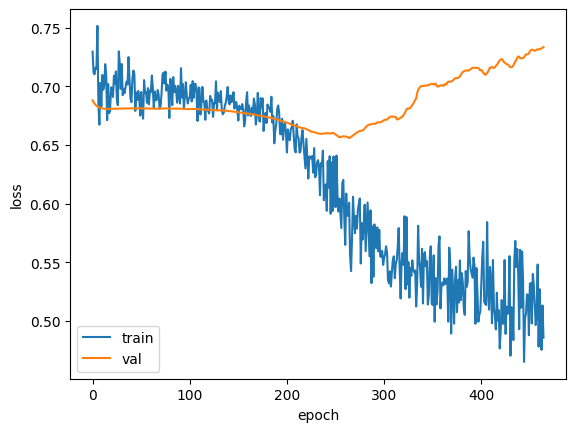

In [163]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
# plt.title(plt_title+plt_title2)
plt.show()

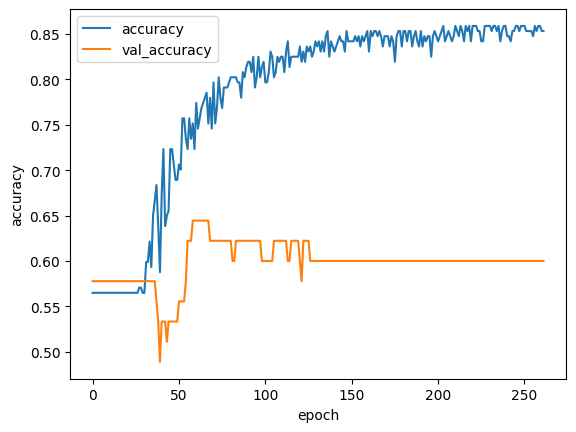

In [143]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['accuracy', 'val_accuracy'])
# plt.title(plt_title+plt_title2)
plt.show()

In [ ]:
# save feature columns
directory = f'./{com_name}/best_model_deep/'
save_to_pickle(directory+f'data_columns_{com_name}.pkl', data_columns)

In [ ]:
earlystopping_cb.stopped_epoch

In [51]:
model.evaluate(test_scaled, test_target)

2/2 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.5714


[0.6912451982498169, 0.5714285969734192]

In [ ]:
model_val = load_model('best_model.h5')
model_val.evaluate(test_scaled, test_target)

In [103]:
y_predict = model.predict(np.array(test_scaled))

2/2 [==============================] - 0s 997us/step


In [104]:
y_predict_list = [1 if i > 0.5 else 0 for i in y_predict[:, 0]]

In [105]:
compare = [ [x, y] for x, y in zip(test_target, y_predict)]
# compare = [ [x, y] for x, y in zip(test_target, y_predict_list)]
compare # 실제값. 예측값

[[1, array([0.58568877], dtype=float32)],
 [0, array([0.5856626], dtype=float32)],
 [0, array([0.58393204], dtype=float32)],
 [0, array([0.51925313], dtype=float32)],
 [0, array([0.3061637], dtype=float32)],
 [1, array([0.58567846], dtype=float32)],
 [1, array([0.3061468], dtype=float32)],
 [1, array([0.30639374], dtype=float32)],
 [1, array([0.306093], dtype=float32)],
 [1, array([0.5856789], dtype=float32)],
 [0, array([0.47882405], dtype=float32)],
 [1, array([0.53347963], dtype=float32)],
 [0, array([0.5856136], dtype=float32)],
 [1, array([0.58554274], dtype=float32)],
 [1, array([0.5855481], dtype=float32)],
 [0, array([0.5822036], dtype=float32)],
 [1, array([0.30611578], dtype=float32)],
 [1, array([0.3061053], dtype=float32)],
 [1, array([0.58553535], dtype=float32)],
 [1, array([0.30644068], dtype=float32)],
 [1, array([0.48171282], dtype=float32)],
 [0, array([0.5624157], dtype=float32)],
 [0, array([0.30610684], dtype=float32)],
 [1, array([0.5857003], dtype=float32)],
 [1,

In [106]:
from sklearn.metrics import precision_score, recall_score
# 정밀도 : 양성으로 예측된 것(TP+FP) 중 얼마나 많은 샘플이 진짜 양성(TP)인지 측정
precision_score(test_target, y_predict_list)  # 정밀도, 입력값의 순서 중요힘. (실제값, 예측값)

0.6

In [56]:
# 재현율 : 전체 양성 샘플(TP+FN) 중에서 얼마나 많은 샘플이 진짜 양성(TP)인지 측정
recall_score(test_target, y_predict_list)  # 재현율, 입력값의 순서 중요힘. (실제값, 예측값)

0.4375

In [57]:
from sklearn.metrics import f1_score

f1_score(test_target, y_predict_list)

0.5384615384615384

In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_target, y_predict_list)

array([[18,  6],
       [18, 14]], dtype=int64)

In [59]:
from sklearn.metrics import roc_auc_score

roc_auc_score(test_target, y_predict_list)

0.59375

1. 정밀도, f1-score, 
2. confusion matrix ((1,1), (2,2), 두개가 큰 비중이면 good, (1,2)은 틀린것을 맞다라고 구분, (2,1)은 맞는 것을 틀린 것이다 라고 결정하는 항목) 따라서
    (2,2) -> (1,2) -> (1,1)로 확인하고. <br>
    (1,2)가 크면 모델 제외 (정밀도(precision = TP / (TP + FP) )가 높아야 함. 낮으면 손해를 보게 됨.), <br>
    재현율(Recall = TP / (TP + FN) ) 은 손해를 끼치지는 않음.
    
<img src="https://raw.githubusercontent.com/fasthill/My-gist/main/data/picture/confusion_matrix.png" width="800"/> <br>